[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sue1242/utilization-azrue-ai/blob/main/src/5-3_computer_vision.ipynb)

## 必要なモジュールのインストール

In [ ]:
!pip install azure-cognitiveservices-vision-computervision==0.9.0 azure-cognitiveservices-vision-customvision==3.1.0 azure-cognitiveservices-vision-face==0.5.0 cognitive-face==1.5.0 python-dotenv==0.15.0

## 必要なデータの準備
### 必要なファイルをGoogle Colabにアップロード
Google Colabでの実行時のみ必要

In [ ]:
# from google.colab import files
# files.upload()

### githubからデータをダウンロード

In [2]:
!git clone https://github.com/sue1242/utilization-azrue-ai.git
!git clone https://github.com/MicrosoftLearning/mslearn-ai900.git

Cloning into 'utilization-azrue-ai'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 175 (delta 60), reused 136 (delta 32), pack-reused 5
Receiving objects: 100% (175/175), 12.38 MiB | 11.72 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Cloning into 'mslearn-ai900'...
remote: Repository not found.
fatal: repository 'https://github.com/MicrosoftLearning/mslearn-ai900.git/' not found


## 書籍内で紹介したコード

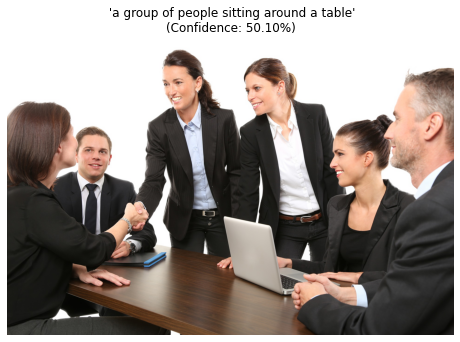

In [1]:
import os

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from dotenv import load_dotenv
from msrest.authentication import CognitiveServicesCredentials

from python_code import vision

load_dotenv(r'.env') # 皆さんのPCでの.envファイルの保存場所に合わせて変更しましょう

# .env ファイルからキーとエンドポイントを読み込む
cog_key = os.getenv('COG_SERVICES_KEY')
cog_endpoint = os.getenv('COG_SERVICES_ENDPOINT')

# Computer Vision にエンドポイントとキーを認識させる
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# 画像ファイルを開く
image_path1 = r'../data/5-3/computer_vision/fig1.jpg' # 皆さんのPCでの画像ファイル保存場所に合わせて変更しましょう
image_stream = open(image_path1, "rb")

# 開いた画像を Computer Vision に認識させる
description = computervision_client.describe_image_in_stream(image_stream)

# ヘルパースクリプトを活用して、結果を表示する
vision.show_image_caption(image_path1, description)

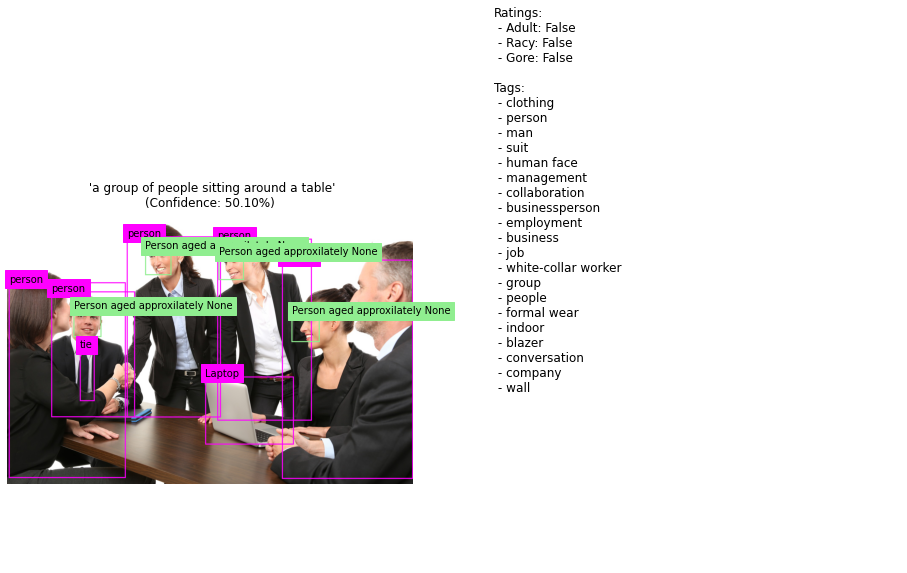

In [2]:
# 画像の読み込み
image_stream = open(image_path1, "rb")

# 判定する項目の設定し、開いた画像をComputer Visionに認識させる
features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']
analysis = computervision_client.analyze_image_in_stream(image_stream, visual_features=features)

# ヘルパースクリプトを活用して、結果を表示する
vision.show_image_analysis(image_path1, analysis)

In [3]:
# 画像ファイルを開く
image_path2 = r'../data/5-3/computer_vision/fig2.jpg' # 皆さんのPCでの画像ファイル保存場所に合わせて変更しましょう
image_stream = open(image_path2, "rb")

# Computer Vision に解析させる
analysis = computervision_client.analyze_image_by_domain_in_stream("landmarks", image_stream)
print()

# Print results of landmark detected
print("Landmarks in the local image:")
if len(analysis.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in analysis.result["landmarks"]:
        print(landmark["name"])
print()


Landmarks in the local image:
Himeji Castle



In [4]:
# 画像ファイルを開く
image_path3 = r'../data/5-3/computer_vision/fig3.jpg' # 皆さんのPCでの画像ファイル保存場所に合わせて変更しましょう
image_stream = open(image_path3, "rb")

# Computer Vision に解析させる
analysis = computervision_client.analyze_image_by_domain_in_stream("landmarks", image_stream)
print()

# Print results of landmark detected
print("Landmarks in the local image:")
if len(analysis.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in analysis.result["landmarks"]:
        print(landmark["name"])
print()


Landmarks in the local image:
No landmarks detected.

